# Основные методы поиска оценок. Задача 2

__Ильичёв А.С., 693__

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#### 1. Считаем данные.

In [13]:
df = pd.read_csv('Cauchy.csv', names=['coord'])

#### 2. Найдем логарифмическую функцию правдоподобия. 

В качестве параметра $\theta$ выступает $x_0$.

$$ p(x) = \frac1{\pi(1+(x-x_0)^2)}$$
$$f_{\theta}(x_1, \dots, x_n) = \prod_{i = 1}^n \frac1{\pi(1+(x_i-x_0)^2)}$$
$$L_{\theta}(x_1, \dots, x_n) = -n\ln\pi - \sum_{i=1}^n\ln(1 + (x_i-x_0)^2)$$

В силу монотонности логарифма для получения оценки  максимального правдоподобия достаточно найти $\underset{\theta}{\mathrm{argmax}}L_\theta(x_1, \dots, x_n)$. Первое слагаемое в $L_\theta$ не зависит от параметра, поэтому при максимизации его можно не учитывать. Избавившись от минуса, получим задачу $$\underset{\theta}{\mathrm{argmin}} \sum_{i=1}^n\ln(1 + (x_i-x_0)^2).$$

#### 3. Оценим параметр сдвига методом максимального правдоподобия.

In [14]:
def calc_func(df, x0):
    # считаем минимизируемую функцию
    return np.sum([np.log(1 + (x - x0)**2) for x in df['coord']])

Оценку производим по сетке c шагом 0.01.

In [15]:
grid = np.linspace(-1000, 1000, 2000 * 100 + 1)
df500 = df.head(500)

In [19]:
def find_min(df):
    vals = np.array([calc_func(df, x0) for x0 in grid])
    plt.figure(figsize=(10,5))
    plt.plot(grid, vals)
    min_i = np.argmin(vals)
    plt.scatter([grid[min_i]], [vals[min_i]], c='red')
    plt.xlabel(r'$x_0$')
    plt.show()
    print('min = ', vals[min_i])
    print('Оценка максимального правдоподобия: theta = ', grid[min_i])
    

a) По половине выборки:

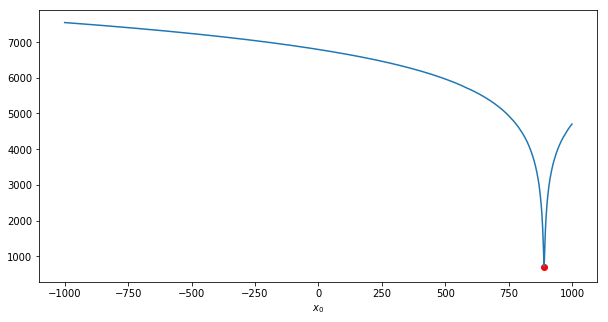

min =  708.2698982665836
Оценка максимального правдоподобия: theta =  890.01


In [20]:
find_min(df500)

б) По всей выборке

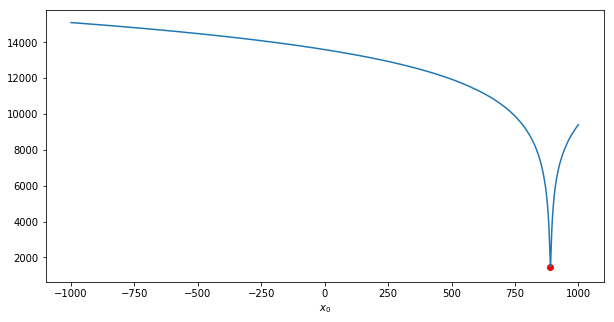

min =  1486.632868733386
Оценка максимального правдоподобия: theta =  889.97


In [21]:
find_min(df)

#### Вывод. 

Полученные значения оценок отличаются, но не сильно. Так что в данном случае, если высокая точность оценки не требуется, можно рассматривать часть выборки, ускоряя вычисления. Кроме того, в данном случае по сути происходит минимизация среднеквадратичного отклонения, поэтому полученное значение $\theta$ близко к среднему значению по выборке:

In [22]:
df['coord'].mean()

890.62409